The purpose of this Jupyter notebook is to visualize the distribution of nearest distances from bike stations to Philly’s public transit stops by transit type. The figure generated here correspond to the left side of Figure 4.

First we import the Python libraries that we need.

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Read in Philly's bikeshare data.

In [2]:
df_bike = pd.read_csv('../Data/philly_summer_bike_station_data.csv')
print('Number of unique census tracts:', df_bike['census_tract'].nunique())
print('Number of unique bikeshare stations:', df_bike['station_name'].nunique())

Number of unique census tracts: 72
Number of unique bikeshare stations: 124


Get metrics involved in average bike share ridership.

In [3]:
print('Median of average bikeshare ridership:', df_bike['average_ridership'].quantile(0.5))
print('Mean of average bikeshare ridership:', df_bike['average_ridership'].mean())
print('Stdev of average bikeshare ridership:', df_bike['average_ridership'].std())
print('Max of average bikeshare ridership:', df_bike['average_ridership'].max())
print('Min of average bikeshare ridership:', df_bike['average_ridership'].min())

Median of average bikeshare ridership: 34.106060604999996
Mean of average bikeshare ridership: 39.676767678048385
Stdev of average bikeshare ridership: 27.04444785955532
Max of average bikeshare ridership: 138.3838384
Min of average bikeshare ridership: 2.1717171719999997


Plot histograms of distance to nearest public transit stops.

Back to histogram plot

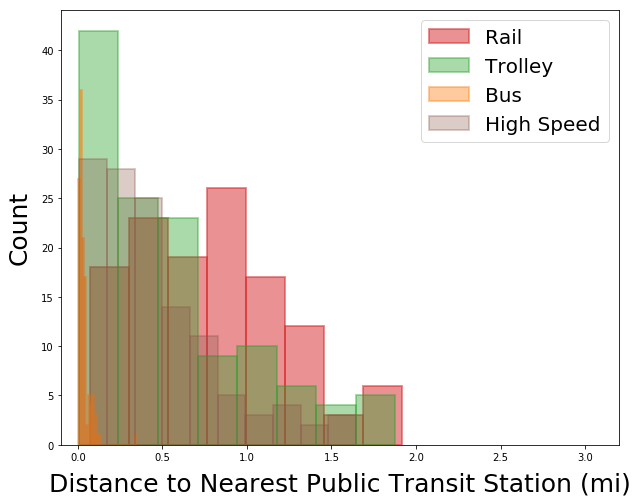

In [4]:
# for everything distance greater than 5, set as 5
transits = ['rail_dist', 'bus_dist', 'trolley_dist', 'high_speed_dist']
for i, transit in enumerate(transits):
    df_bike[transit+'2'] = df_bike[transit]
    for index, row in df_bike.iterrows():
        if row[transit] > 5:
             df_bike.loc[index, transit+'2'] = 5
                
plt.figure(figsize=(10, 8))
plt.xlim((-0.1, 3.2))
# transits = ['rail_dist', 'bus_dist', 'trolley_dist', 'high_speed_dist']
transits = ['rail_dist2', 'trolley_dist2', 'bus_dist2', 'high_speed_dist2' ]
color_dict = {'rail_dist':'C3', 'bus_dist':'C1', 'trolley_dist':'C2', 'high_speed_dist':'C5'}
opacity_dict = {'rail_dist':0.5, 'bus_dist':0.4, 'trolley_dist':0.4, 'high_speed_dist':0.3}
labels = ['Rail', 'Trolley', 'Bus', 'High Speed']
for i, transit in enumerate(transits):
    sns.distplot(df_bike[transit].values*0.621371, hist = True, kde = False, color = color_dict[transit[:-1]],
                 hist_kws = {'edgecolor': color_dict[transit[:-1]], 'linewidth': 2, 'alpha':opacity_dict[transit[:-1]]},
                 label = labels[i])

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xlabel('Distance to Nearest Public Transit Station (mi)', fontsize=25, labelpad=10)
plt.ylabel('Count', fontsize=25, labelpad=10)
plt.legend(loc='best', fontsize=20)
plt.show()